In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

from generation.dataset.amplitudes_dataset import AmplitudesDataset

In [2]:
dataset = AmplitudesDataset()

In [3]:
_DETECTORS_NUM = 9

def _plot_scatter(ax, detector1, detector2, alpha=1.0):
    amplitudes1 = dataset.amplitudes[detector1]
    amplitudes2 = dataset.amplitudes[detector2]
    ax.scatter(amplitudes1, amplitudes2, alpha=alpha)

def prepare_figure_axis():
    f, ax = plt.subplots(_DETECTORS_NUM, _DETECTORS_NUM, figsize=(15, 15))
    cols = ['Detector {}'.format(detector) for detector in range(_DETECTORS_NUM)]
    rows = ['Detector {}'.format(detector) for detector in range(_DETECTORS_NUM)]

    for _ax, col in zip(ax[0], cols):
        _ax.set_title(col)
    for _ax, row in zip(ax[:,0], rows):
        _ax.set_ylabel(row, rotation=90)
    f.suptitle("Detector amplitudes scatter plots", fontsize=20, weight='bold')

    return f, ax


In [4]:
correlations = np.zeros((_DETECTORS_NUM, _DETECTORS_NUM))

for detector1 in tqdm.tqdm(range(_DETECTORS_NUM)):
    for detector2 in range(_DETECTORS_NUM):
        amplitudes1 = dataset.amplitudes[detector1]
        amplitudes2 = dataset.amplitudes[detector2]
        corrcoef = np.corrcoef(amplitudes1, amplitudes2)[0][1]
        correlations[detector1][detector2] = round(corrcoef, 2)
        
print(correlations)

100%|██████████| 9/9 [00:00<00:00, 293.32it/s]

[[1.   0.19 0.09 0.35 0.28 0.14 0.29 0.15 0.16]
 [0.19 1.   0.29 0.33 0.45 0.17 0.13 0.26 0.19]
 [0.09 0.29 1.   0.11 0.36 0.18 0.04 0.17 0.27]
 [0.35 0.33 0.11 1.   0.36 0.14 0.21 0.17 0.06]
 [0.28 0.45 0.36 0.36 1.   0.43 0.22 0.46 0.34]
 [0.14 0.17 0.18 0.14 0.43 1.   0.07 0.16 0.38]
 [0.29 0.13 0.04 0.21 0.22 0.07 1.   0.17 0.13]
 [0.15 0.26 0.17 0.17 0.46 0.16 0.17 1.   0.19]
 [0.16 0.19 0.27 0.06 0.34 0.38 0.13 0.19 1.  ]]


100%|██████████| 9/9 [00:00<00:00, 13.28it/s]


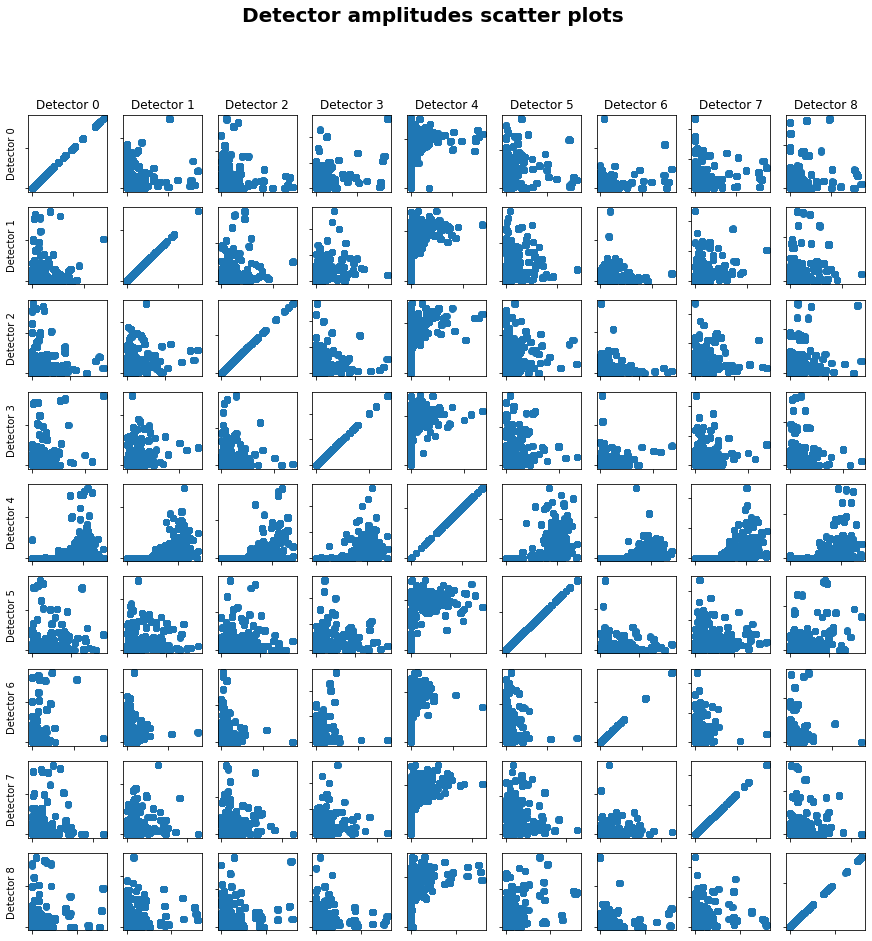

In [5]:
f, ax = prepare_figure_axis()
for detector1 in tqdm.tqdm(range(_DETECTORS_NUM)):
    for detector2 in range(_DETECTORS_NUM):
        ax[detector1][detector2].set_xticklabels([])
        ax[detector1][detector2].set_yticklabels([])
        _plot_scatter(ax[detector1][detector2], detector1, detector2)
plt.show()